In [258]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

import seaborn as sns
import matplotlib.pyplot as plt

In [259]:
#fungsi untuk uji herbal terhadap model
# model -> lokasi model
# df -> dataframe fignerprint
# kelasdata -> multilabel kelas/output

def prediksi(model, df, kelasdata):
    
    #Predict data herbal
    yhat_herbal_proba =  model.predict(df)
    # # round probabilities to class labels
    yhat_herbal = yhat_herbal_proba.round()
    yhat_herbal
    
    hasil_prediksi_proba = pd.DataFrame(yhat_herbal_proba, columns = kelasdata.columns)
    hasil_prediksi = pd.DataFrame(yhat_herbal, columns = kelasdata.columns)
    
    return [hasil_prediksi, hasil_prediksi_proba]


In [260]:
# hasil_prediksi -> hasil prediksi fungsi hasil_prediksi
# hasil_prediksi_proba -> hasil prediksi probability fungsi hasil_prediksi
# data_herbal -> data herbal

def testing_herbal(hasil_prediksi, hasil_prediksi_proba, data_herbal):
    # Isi kembali nama senyawa 
    hasil_prediksi['Senyawa']=data_herbal['Senyawa']
    hasil = pd.DataFrame(columns = ['Senyawa', 'List Protein', 'Probability'])
    hasil
    
    # Cari nama protein yang sesuai dengan hasil prediksi
    for i in range(len(hasil_prediksi)):
        #Array protein
        protein_list = []
        #Array Probabilitas
        proba_list = []
        for j in range(0,7):
            #apabila hasil prediksi senyawa bernilai 1 
            if hasil_prediksi.iloc[i,j]==1:
                #Cari nama senyawa yang sesuai
                hasil.loc[i,'Senyawa'] = hasil_prediksi['Senyawa'][i]
                #Cari nama protein yang sesuai
                protein_name = hasil_prediksi.columns[j]
                proba = hasil_prediksi_proba.iloc[i,j]
                #Simpan nama protein dan probabilitasnya
                protein_list.append(protein_name)
                proba_list.append(proba)
        #apabila hasil prediksi bernilai 0, maka Protein None
        if len(protein_list)==0:
            hasil.loc[i,'List Protein'] = None
        else:
            hasil.loc[i,'List Protein'] = protein_list
        hasil.loc[i,'Probability'] = proba_list
    #Hapus missing values
    hasil = hasil.dropna()
    #Hitung total protein yang berinteraksi
    hasil['Total'] = hasil_prediksi.sum(axis=1)[hasil_prediksi.sum(axis=1)>=1]
    #Urutkan berdasarkan banyak protein
    hasil.sort_values(by=['Total'], inplace=True)
    # Simpan ke file
    
    return hasil

In [261]:
#fungsi untuk visualisasi

def visual_herbal(hasil_prediksi):
    rowSums = hasil_prediksi.sum(axis=1)
    multiLabel_counts = rowSums.value_counts()
    multiLabel_counts = multiLabel_counts.sort_index()
    
    sns.set(font_scale = 2)
    plt.figure(figsize=(25,8))
    ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

    plt.title("Herbal Compounds having multiple Protein")
    plt.ylabel('Number of compounds', fontsize=25)
    plt.xlabel('Number of Protein', fontsize=25)
    
    #adding the text labels
    rects = ax.patches
    labels = multiLabel_counts.values
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.show()


# Model

In [262]:
#load dataset
df_pubchem = pd.read_csv('dataset/testing/com_fp_pubchem.csv')
df_maccs = pd.read_csv('dataset/testing/com_fp_maccs.csv')
df_klekota = pd.read_csv('dataset/testing/com_fp_klekota-roth.csv')

kelasdata = pd.read_csv('dataset/final/kelas_data.csv')
data_herbal = pd.read_csv('dataset/testing/data_herbal_siap.csv')

In [263]:
#load model

model_pubchem = load_model('model/sae_dnn_pubchem_tuned.h5')
model_maccs = load_model('model/sae_dnn_maccs_tuned.h5')
model_klekota = load_model('model/sae_dnn_klekota_tuned.h5')


# Main

In [264]:
df = df_klekota
model = model_klekota

In [265]:
prediksi = prediksi(model, df, kelasdata)

10/10 [==============================] - 0s 23ms/step


In [266]:
hasil_prediksi = prediksi[0]
hasil_prediksi_proba = prediksi[1]

In [267]:
hasil_prediksi

,PPARGC1A,INS,LEP,B3GNTL1,PPARG,EP300,LPL
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
300,0.0,0.0,0.0,0.0,1.0,0.0,0.0
301,0.0,0.0,0.0,0.0,1.0,0.0,0.0
302,0.0,0.0,0.0,0.0,1.0,0.0,0.0
303,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [268]:
hasil_prediksi_proba

,PPARGC1A,INS,LEP,B3GNTL1,PPARG,EP300,LPL
0,6.506935e-05,1.643039e-05,2.292516e-07,8.074221e-15,0.720745,0.069166,0.054510
1,4.948388e-04,1.222572e-05,3.479571e-07,3.735049e-14,0.878420,0.007354,0.613307
2,1.080235e-04,8.971151e-06,4.262633e-07,2.802026e-14,0.778126,0.022380,0.612656
3,7.626138e-08,4.537716e-09,6.305803e-12,5.334324e-18,0.633412,0.991579,0.000002
4,4.637147e-05,3.092667e-07,1.954076e-09,1.621174e-15,0.999294,0.000036,0.028110
...,...,...,...,...,...,...,...
300,7.913452e-06,8.112353e-06,6.079832e-08,1.470379e-16,0.895394,0.000053,0.003775
301,1.158048e-04,1.098710e-05,4.135684e-08,4.273602e-16,0.955371,0.000123,0.008389
302,7.659691e-05,5.720540e-06,4.141036e-08,1.569953e-15,0.954492,0.000195,0.009952
303,1.231563e-04,1.255615e-05,5.353688e-08,9.935549e-16,0.949816,0.000208,0.007931


In [269]:
testing_herbal = testing_herbal(hasil_prediksi, hasil_prediksi_proba, data_herbal)
testing_herbal

/tmp/ipykernel_97181/481122460.py:37: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hasil['Total'] = hasil_prediksi.sum(axis=1)[hasil_prediksi.sum(axis=1)>=1]


,Senyawa,List Protein,Probability,Total
0,Tetrahydroxyflavone,[PPARG],[0.7207451],1.0
167,"1-hydroxy-3,6,7-trimethoxy-2-(2-hydroxy-3-meth...",[PPARG],[0.99980354],1.0
168,"1-hydroxy-3,6,7-trimethoxy-2-(3-methyl-2-buten...",[PPARG],[0.99978745],1.0
169,"1-hydroxy-3,6,7-trimethoxy-2-(3-methyl-2-buten...",[PPARG],[0.9999942],1.0
170,"1-hydroxy-3,6,7-trimethoxy-2,8-diprenylxanthone",[PPARG],[0.999806],1.0
...,...,...,...,...
133,Fisetin,"[LEP, B3GNTL1, EP300, LPL]","[1.0, 1.0, 1.0, 1.0]",4.0
218,Benzyl alcohol,"[INS, LEP, PPARG, EP300, LPL]","[1.0, 1.0, 1.0, 1.0, 1.0]",5.0
12,Tinosporaside,"[PPARGC1A, LEP, PPARG, EP300, LPL]","[1.0, 1.0, 1.0, 1.0, 1.0]",5.0
123,24-isopropyl cholesterol,"[INS, LEP, B3GNTL1, EP300, LPL]","[1.0, 1.0, 1.0, 1.0, 1.0]",5.0


/tmp/ipykernel_97181/3316879530.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowSums = hasil_prediksi.sum(axis=1)
/home/fadilrisdian/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


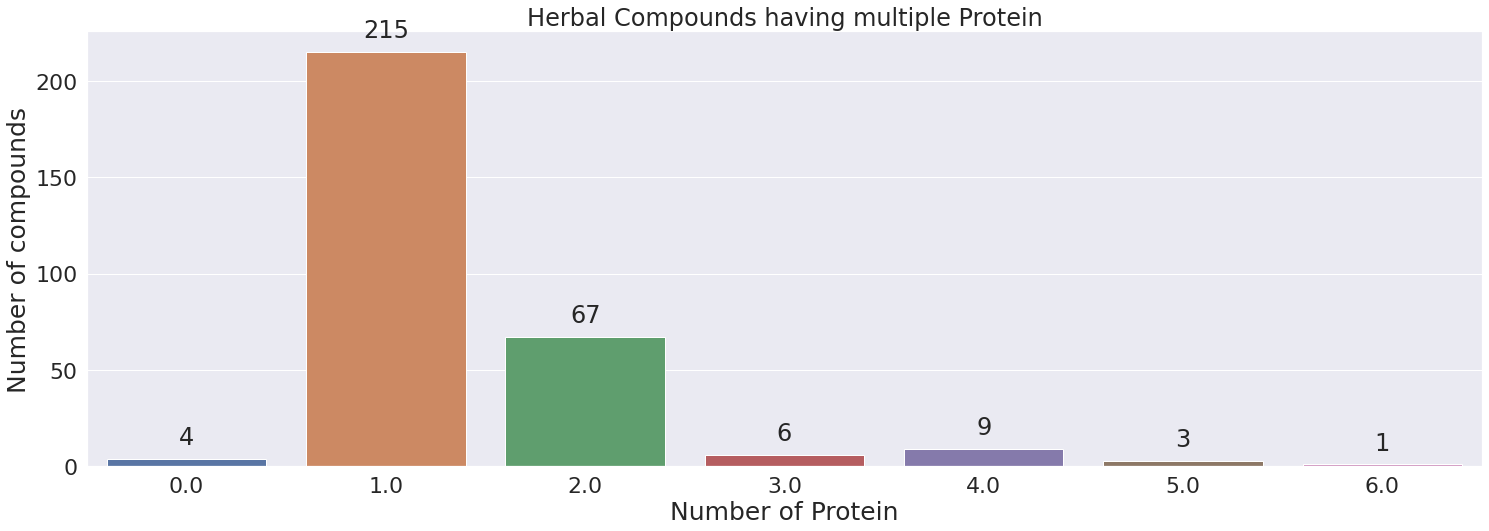

In [270]:
visual_herbal(hasil_prediksi)

In [240]:
pubchem_herbal = testing_herbal

In [257]:
pubchem_herbal

,Senyawa,List Protein,Probability,Total
0,Tetrahydroxyflavone,[EP300],[0.88143086],1.0
178,9-hydroxycalabaxanthone,[EP300],[0.7450957],1.0
179,A-mangostin,[EP300],[0.979763],1.0
180,B-mangostin,[PPARG],[0.8307165],1.0
181,Br-xanthone a,[PPARG],[0.7472775],1.0
...,...,...,...,...
137,Geranin b,"[PPARGC1A, INS, LEP, PPARG, EP300]","[1.0, 1.0, 1.0, 1.0, 1.0]",5.0
123,24-isopropyl cholesterol,"[PPARGC1A, INS, LEP, B3GNTL1, EP300]","[1.0, 1.0, 1.0, 1.0, 1.0]",5.0
146,Caproic acid,"[PPARGC1A, INS, LEP, PPARG, LPL]","[1.0, 1.0, 1.0, 1.0, 1.0]",5.0
292,Syringaresinol,"[PPARGC1A, INS, LEP, PPARG, LPL]","[1.0, 1.0, 1.0, 1.0, 1.0]",5.0


In [278]:
maccs_herbal

,Senyawa,List Protein,Probability,Total
16,Terpinyl acetate,[PPARG],[0.53318983],1.0
178,9-hydroxycalabaxanthone,[PPARG],[0.60902154],1.0
177,8-deoxygartanin,[PPARG],[0.51208377],1.0
175,"6,8-dihydroxy-1,7-diprenylxanthone-2-carboxyli...",[PPARG],[0.5255246],1.0
174,3-isomangostin,[PPARG],[0.83217543],1.0
...,...,...,...,...
91,Maclurin,[PPARG],[0.78082323],1.0
84,Mangiferin,[PPARG],[0.5446062],1.0
125,Amarulone,[PPARG],[0.8953792],1.0
299,Beta-glucogallin,[PPARG],[0.8953792],1.0


In [277]:
klekota_herbal = testing_herbal
klekota_herbal

,Senyawa,List Protein,Probability,Total
0,Tetrahydroxyflavone,[PPARG],[0.7207451],1.0
167,"1-hydroxy-3,6,7-trimethoxy-2-(2-hydroxy-3-meth...",[PPARG],[0.99980354],1.0
168,"1-hydroxy-3,6,7-trimethoxy-2-(3-methyl-2-buten...",[PPARG],[0.99978745],1.0
169,"1-hydroxy-3,6,7-trimethoxy-2-(3-methyl-2-buten...",[PPARG],[0.9999942],1.0
170,"1-hydroxy-3,6,7-trimethoxy-2,8-diprenylxanthone",[PPARG],[0.999806],1.0
...,...,...,...,...
133,Fisetin,"[LEP, B3GNTL1, EP300, LPL]","[1.0, 1.0, 1.0, 1.0]",4.0
218,Benzyl alcohol,"[INS, LEP, PPARG, EP300, LPL]","[1.0, 1.0, 1.0, 1.0, 1.0]",5.0
12,Tinosporaside,"[PPARGC1A, LEP, PPARG, EP300, LPL]","[1.0, 1.0, 1.0, 1.0, 1.0]",5.0
123,24-isopropyl cholesterol,"[INS, LEP, B3GNTL1, EP300, LPL]","[1.0, 1.0, 1.0, 1.0, 1.0]",5.0


In [272]:
total = pubchem_herbal['Senyawa'] + maccs_herbal['Senyawa'] + maccs_klekota['Senyawa']

In [281]:
pubchem = pubchem_herbal['Senyawa']

In [282]:
maccs = maccs_herbal['Senyawa']

In [283]:
klekota = klekota_herbal['Senyawa']

In [285]:
df_akhir = pd.concat([pubchem, maccs, klekota], axis=0)

In [ ]:
df_akhir

In [ ]:
df_akhir[df_akhir.duplicated(keep='last')]